# Rainfall Prediction

## Data Preprocessing

### The main aim is to predict Rainfall

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Datasets

In [3]:
df = pd.read_excel('C:/Users/Akash/Desktop/DataScienceCourse/InterviewPreparation/sydney_rain prediction.xlsx')

In [4]:
df.shape

(3337, 17)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


## Exploring Data

## Performin EDD on our dataset(Before Preprocessing)

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

This dataset contains 4 categorical variables and rest are numerical

## Converting Categorical Data to Numerical Data

In [8]:
#Replacin Yes to 1 and No to 0 in RainToday and RainTomorrow features
df['RainToday'] = df['RainToday'].replace({'Yes' : 1, 'No' : 0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes' : 1, 'No' : 0})

In [9]:
#Splitting Date feature into Year, month, and day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop(['Date'], axis =1, inplace=True)

<AxesSubplot:xlabel='Location', ylabel='count'>

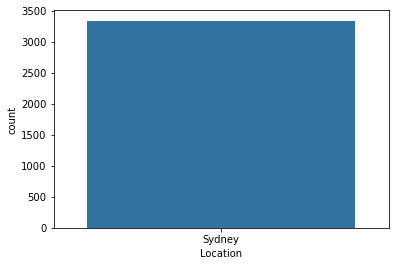

In [10]:
#Creting barplot for location feature
sns.countplot(x = "Location" , data= df)

In [11]:
#Droping Location column as it contains only single unique value 'Sydeny'
df.drop('Location', axis = 1, inplace = True)

In [12]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,month,day
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1,2008,2,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1,2008,2,2
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1,2008,2,3
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1,2008,2,4
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1,2008,2,5


## Heading Missing Values

<AxesSubplot:>

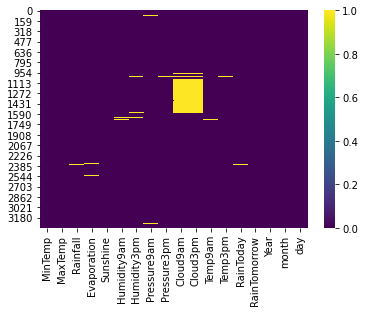

In [13]:
#Creating heatmap of missing values
sns.heatmap(df.isnull(), cmap = 'viridis')

#### Here the yellow lines represent amount of missing values in dataset

In [14]:
#Getting percentage of null values in dataset corresponding to their features
null_percentage = df.isnull().mean() * 100
null_percentage

MinTemp          0.089901
MaxTemp          0.059934
Rainfall         0.179802
Evaporation      1.528319
Sunshine         0.479473
Humidity9am      0.419539
Humidity3pm      0.389571
Pressure9am      0.599341
Pressure3pm      0.569374
Cloud9am        16.961343
Cloud3pm        16.811507
Temp9am          0.119868
Temp3pm          0.119868
RainToday        0.179802
RainTomorrow     0.000000
Year             0.000000
month            0.000000
day              0.000000
dtype: float64

In [15]:
#Specify the columns that contains less than 5% missing values
columns_with_missing = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','Humidity9am','Humidity3pm','Pressure9am',
                        'Pressure3pm','Temp9am','Temp3pm','RainToday']

#Removing rows with missing values in the sprecified columns
df2= df.dropna(subset = columns_with_missing)

In [16]:
#Filling rest columns that missing values with their mean or mode whichever necessary
df2 = df2.fillna(df.mean())

<AxesSubplot:>

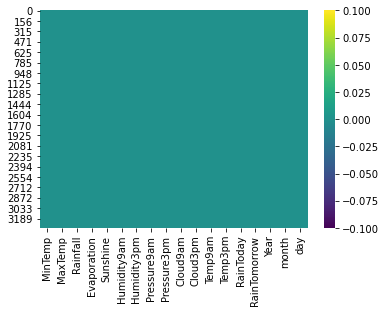

In [17]:
#Again creating heatmap of missing values
sns.heatmap(df2.isnull(), cmap ='viridis')

#### Now our dataset dont have any missing values

In [18]:
print("Previous dataset contains", df.shape[0],"rows")
print("Dataset after removing missing values contains",df2.shape[0],"rows")

Previous dataset contains 3337 rows
Dataset after removing missing values contains 3220 rows


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 0 to 3336
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3220 non-null   float64
 1   MaxTemp       3220 non-null   float64
 2   Rainfall      3220 non-null   float64
 3   Evaporation   3220 non-null   float64
 4   Sunshine      3220 non-null   float64
 5   Humidity9am   3220 non-null   float64
 6   Humidity3pm   3220 non-null   float64
 7   Pressure9am   3220 non-null   float64
 8   Pressure3pm   3220 non-null   float64
 9   Cloud9am      3220 non-null   float64
 10  Cloud3pm      3220 non-null   float64
 11  Temp9am       3220 non-null   float64
 12  Temp3pm       3220 non-null   float64
 13  RainToday     3220 non-null   float64
 14  RainTomorrow  3220 non-null   int64  
 15  Year          3220 non-null   int64  
 16  month         3220 non-null   int64  
 17  day           3220 non-null   int64  
dtypes: float64(14), int64(4)
mem

In [20]:
#Checking for duplicate rows
df2.duplicated().sum()

0

## Data Visualization

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

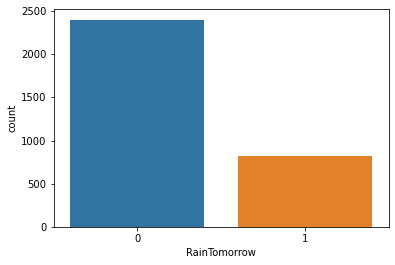

In [21]:
sns.countplot(x = 'RainTomorrow', data = df2)

## Heatmap of a Correalation matrix

<AxesSubplot:>

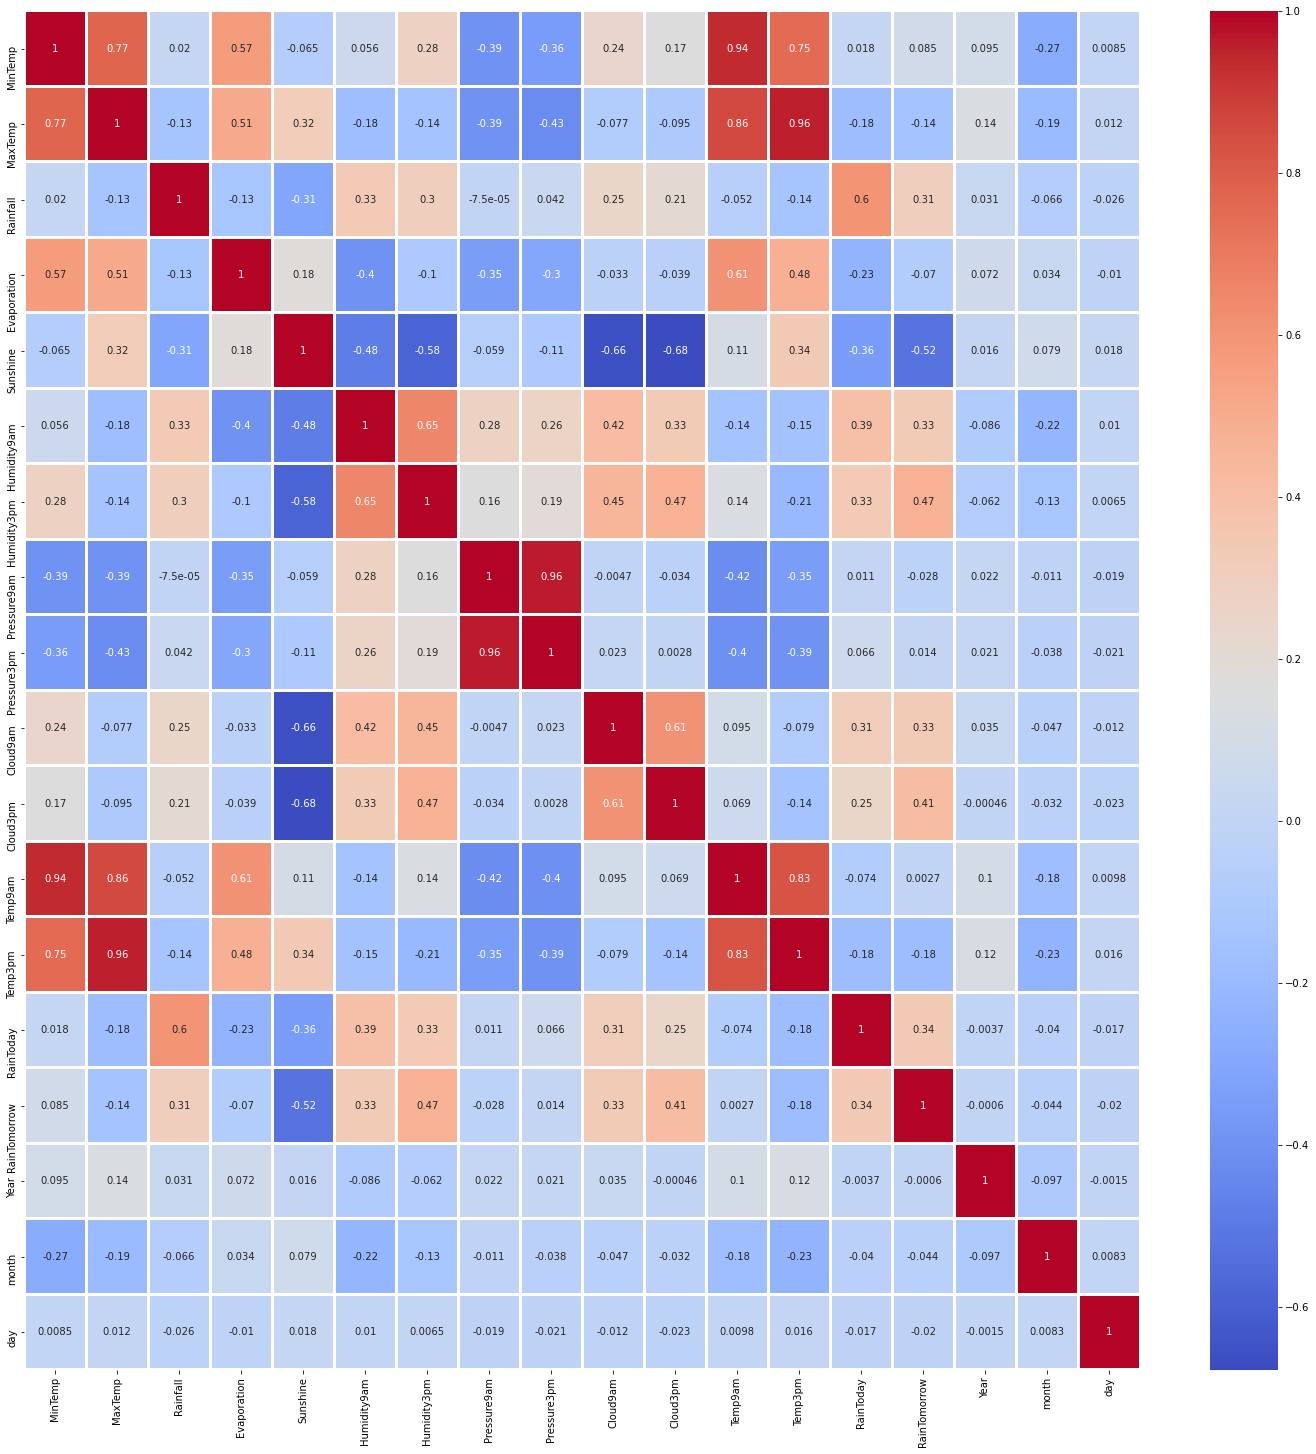

In [22]:
plt.figure(figsize=(25,25))
sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm', linewidths = 2)

## Creating heatmap after removing multicollinearity

<AxesSubplot:>

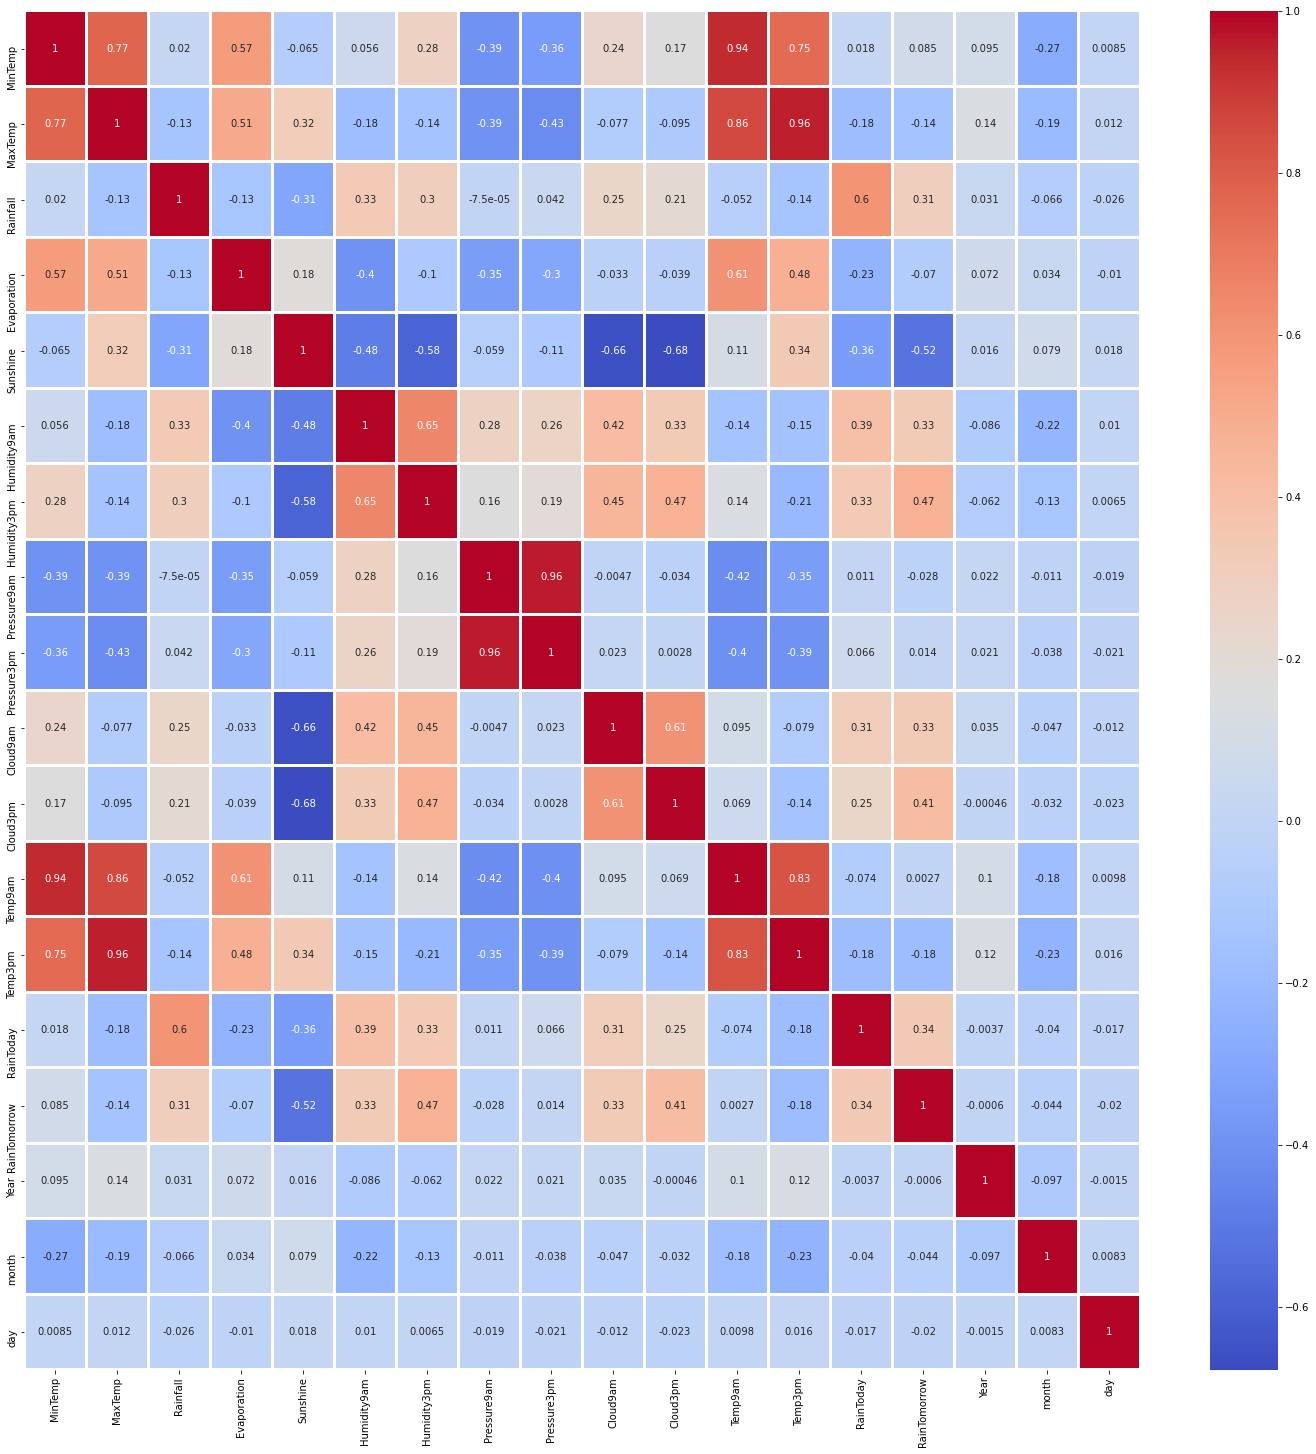

In [23]:
plt.figure(figsize = (25,25))
sns.heatmap(df2.corr(),annot = True, cmap ='coolwarm',linewidth = 2)

In [24]:
# function to create histogram, and boxplot
 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 
    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()

******* MinTemp *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


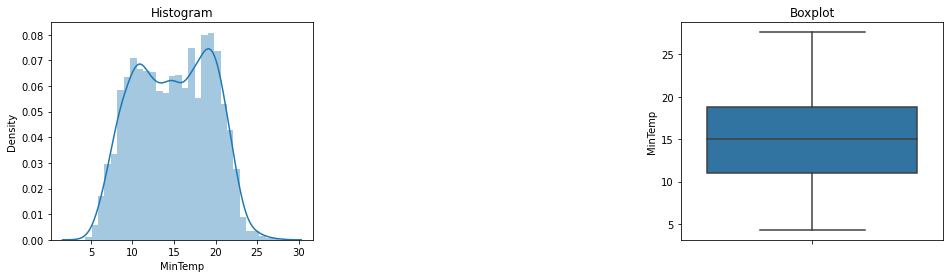

******* MaxTemp *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


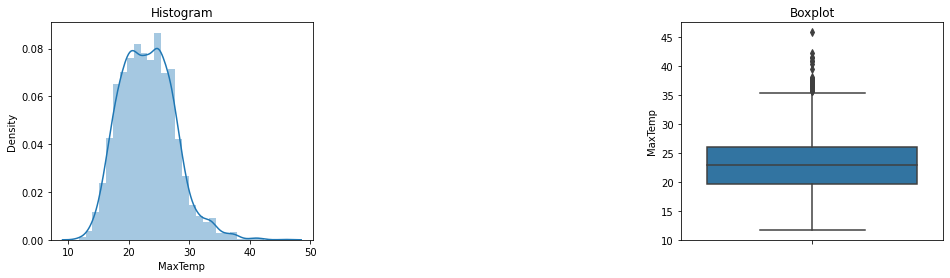

******* Rainfall *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


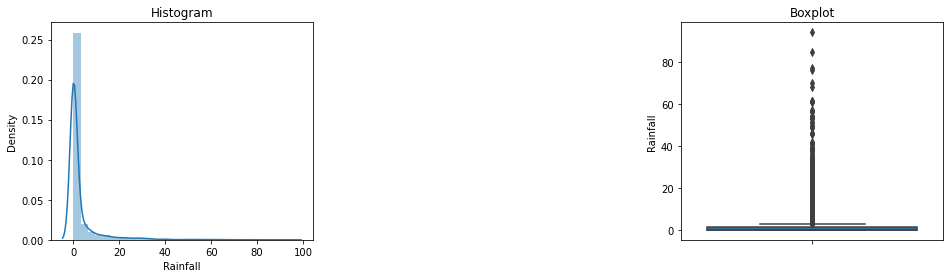

******* Evaporation *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


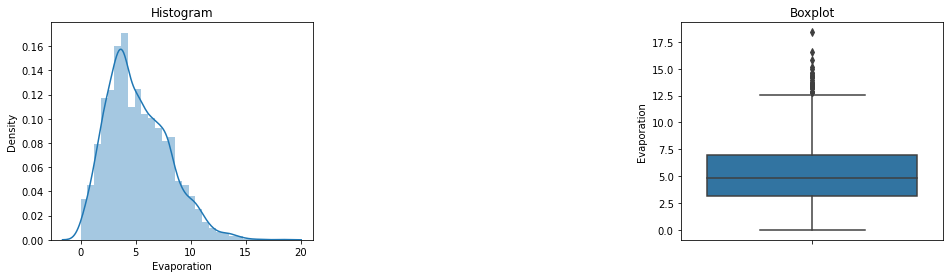

******* Sunshine *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


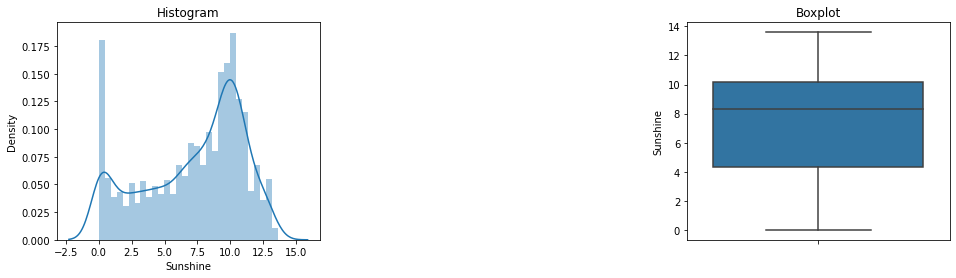

******* Humidity9am *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


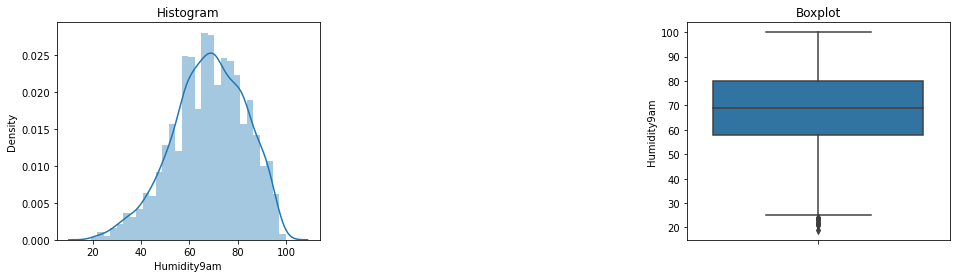

******* Humidity3pm *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


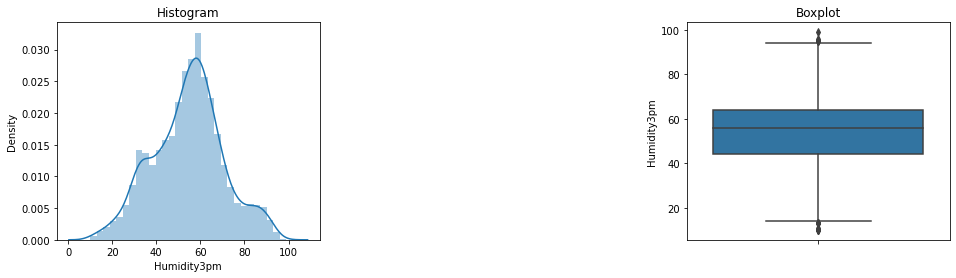

******* Pressure9am *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


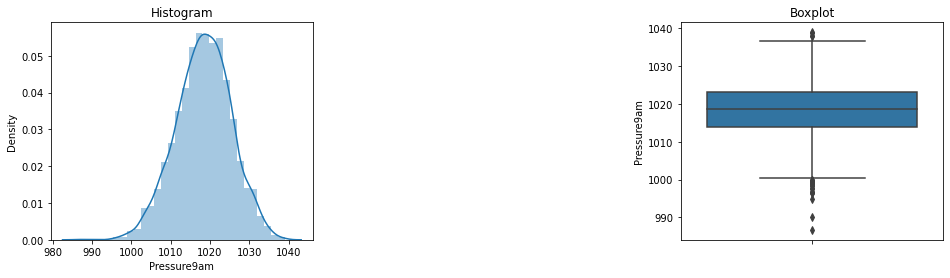

******* Pressure3pm *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


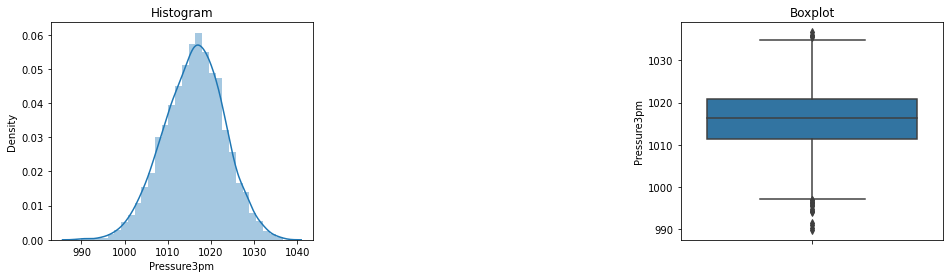

******* Cloud9am *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


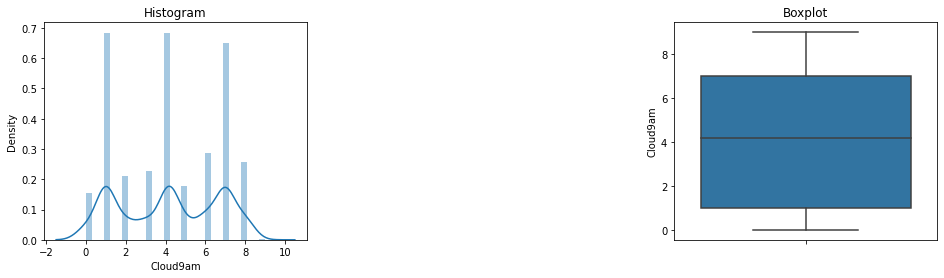

******* Cloud3pm *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


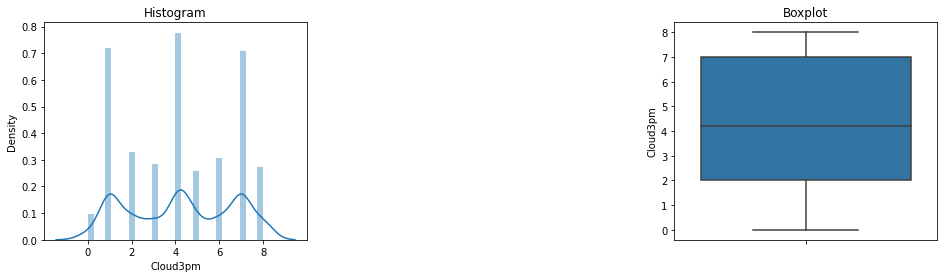

******* Temp9am *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


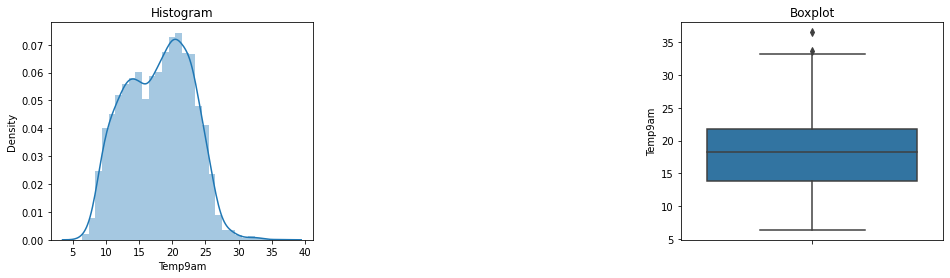

******* Temp3pm *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


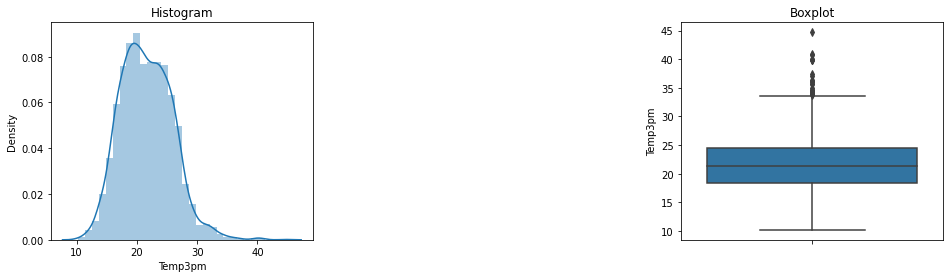

******* RainToday *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


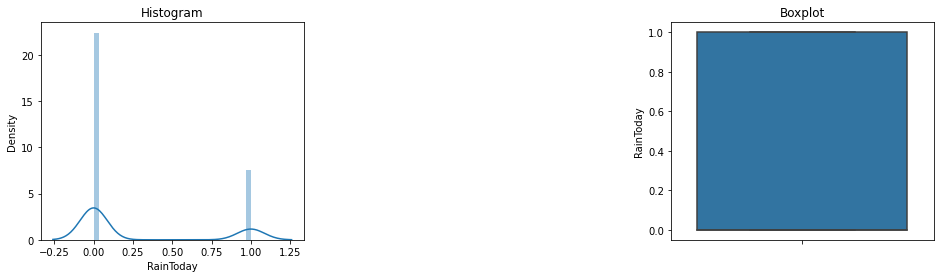

******* RainTomorrow *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


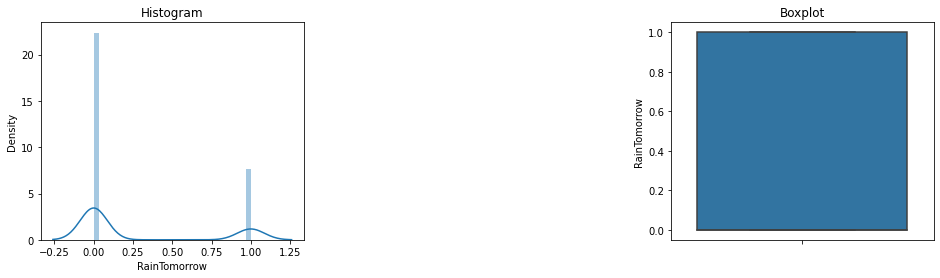

******* Year *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


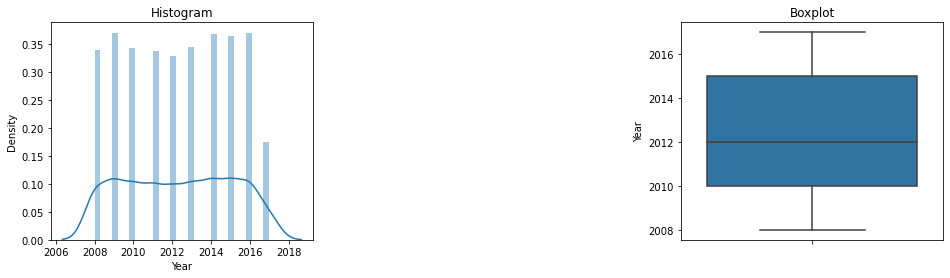

******* month *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


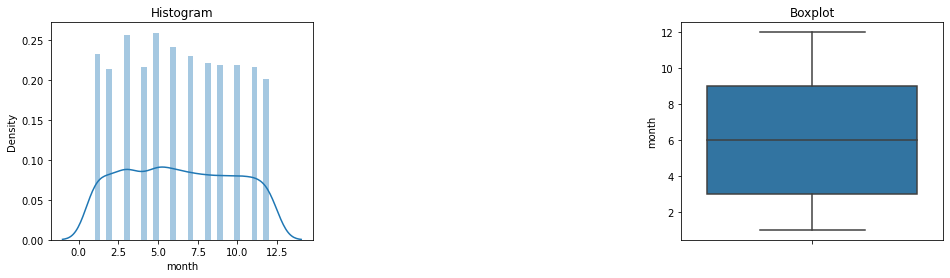

******* day *******


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


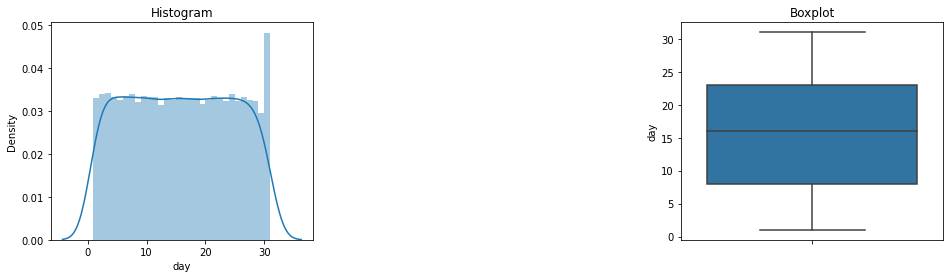

In [25]:
# Calling diagnostic_plots function before removing outliers
for item in df2.columns:
    print("******* {} *******".format(item))
    diagnostic_plots(df2, item)

## Handling Outliers

In [26]:
#function to handle outliers using Interquartile range
def handle_outliers_iqr(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 -q1
    lower_threshold = q1 - (1.5 * iqr)
    upper_threshold = q3 + (1.5 * iqr)
    
    df2.loc[df[feature] <= lower_threshold, feature] = lower_threshold
    df2.loc[df[feature] >= upper_threshold, feature] = upper_threshold
    
    return df2

In [27]:
#callling handle_outliers_iqr function for removing outliers
for feature in df2.columns:
    df2 = handle_outliers_iqr(df2, feature)

***** MinTemp *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


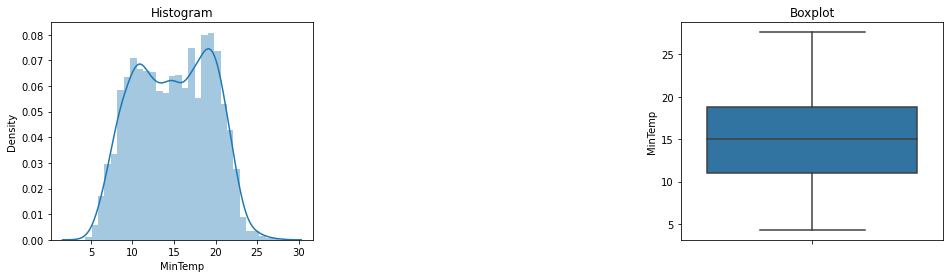

***** MaxTemp *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


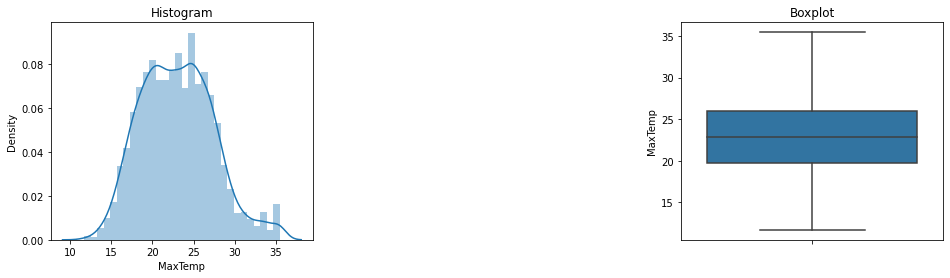

***** Rainfall *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


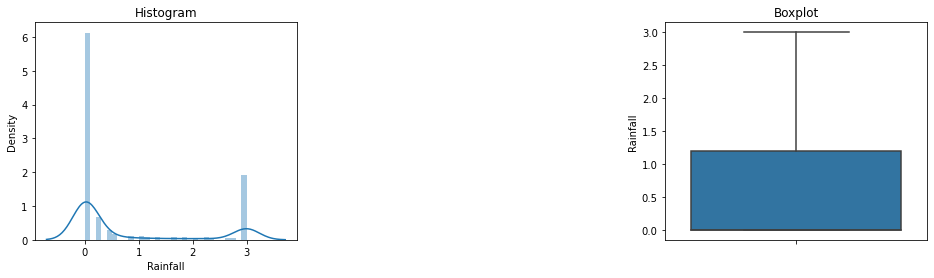

***** Evaporation *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


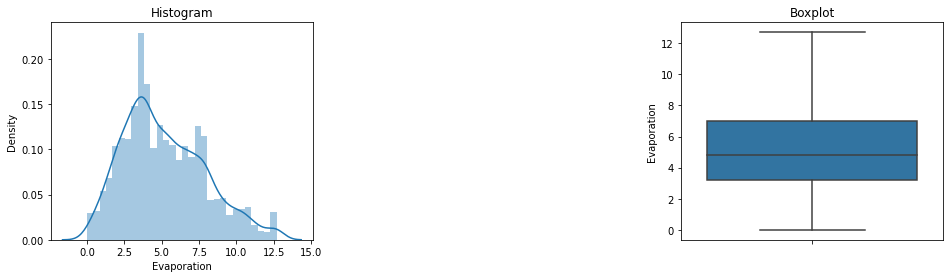

***** Sunshine *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


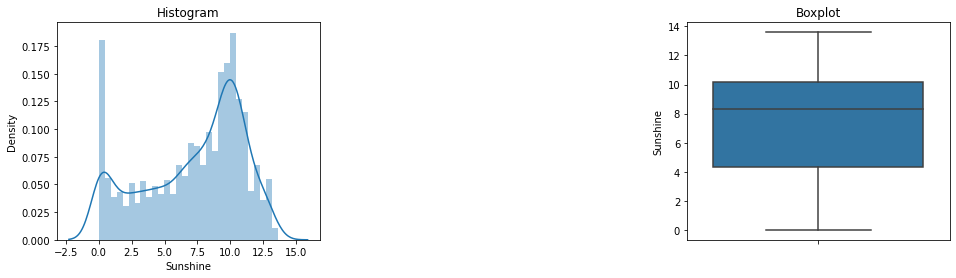

***** Humidity9am *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


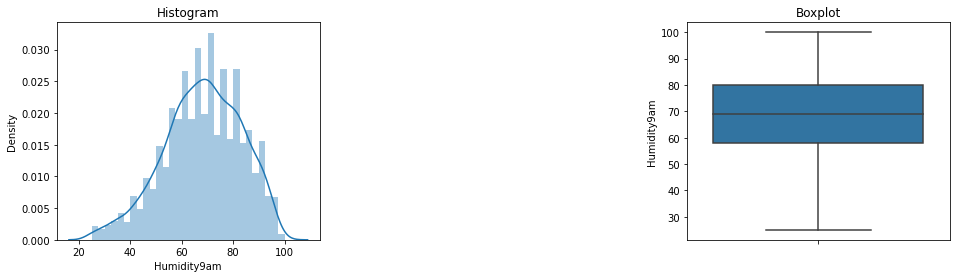

***** Humidity3pm *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


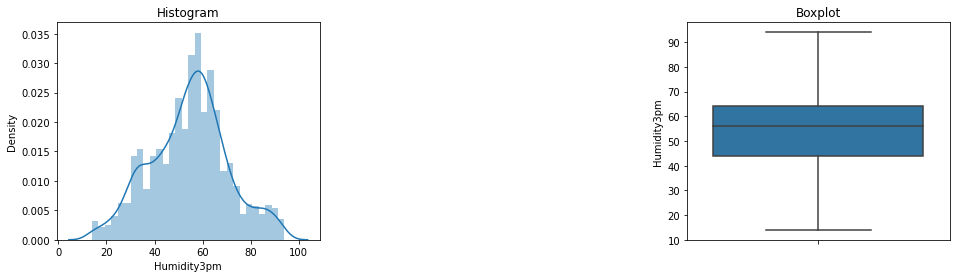

***** Pressure9am *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


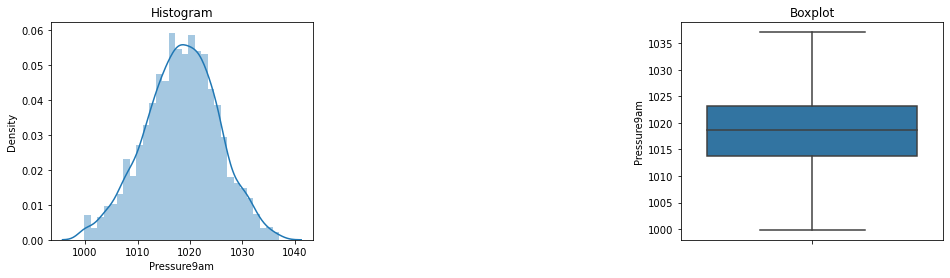

***** Pressure3pm *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


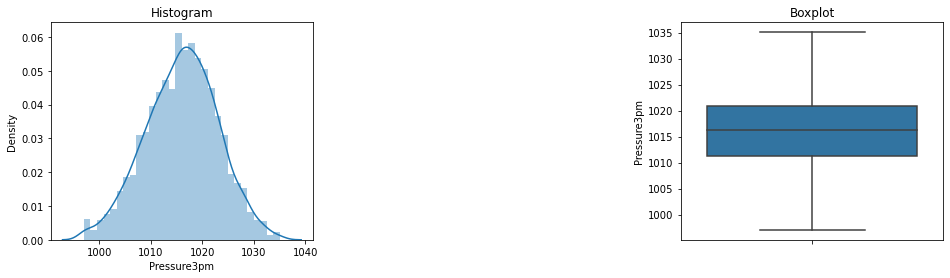

***** Cloud9am *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


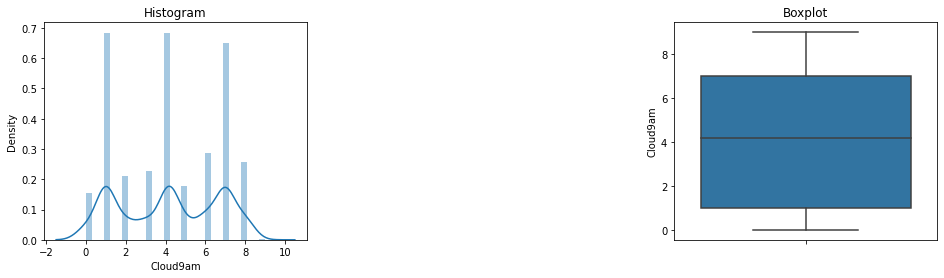

***** Cloud3pm *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


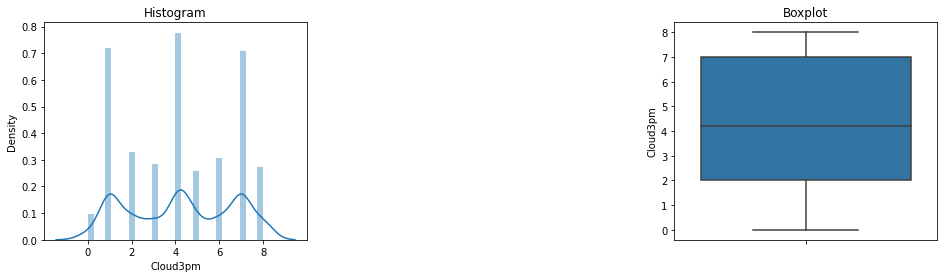

***** Temp9am *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


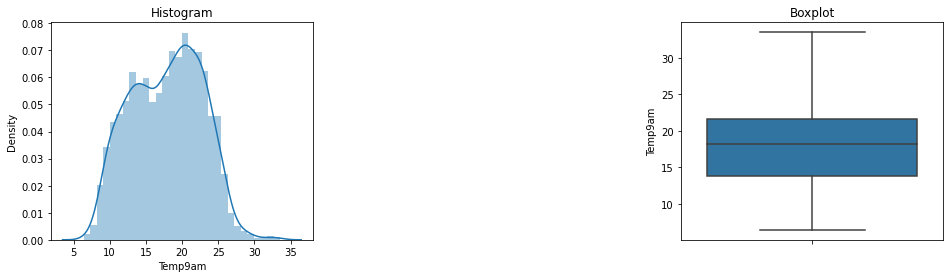

***** Temp3pm *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


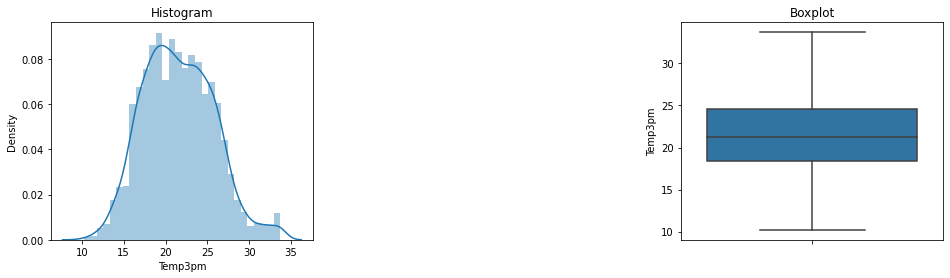

***** RainToday *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


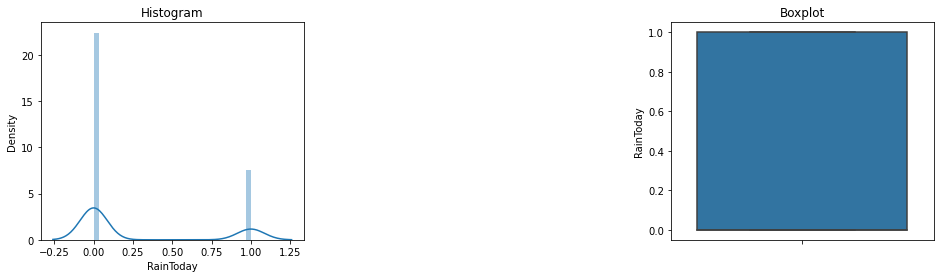

***** RainTomorrow *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


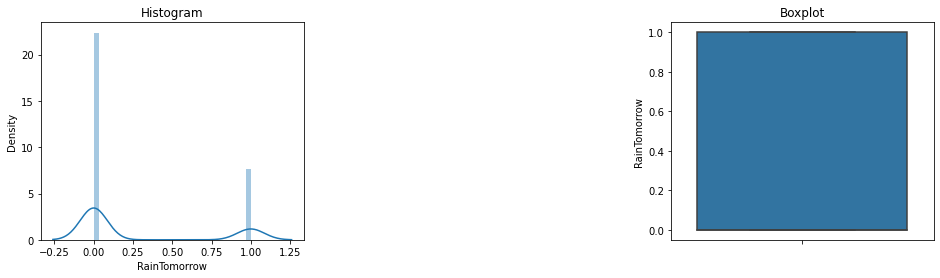

***** Year *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


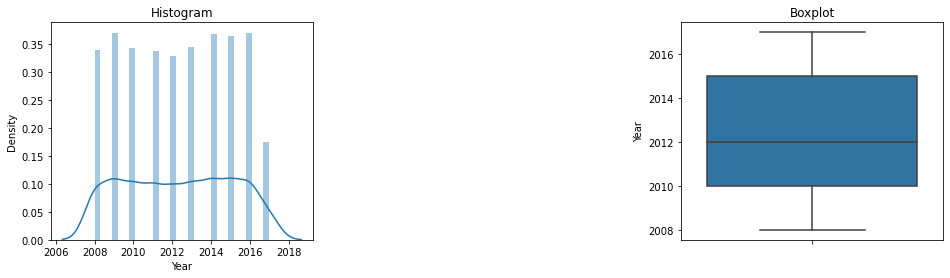

***** month *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


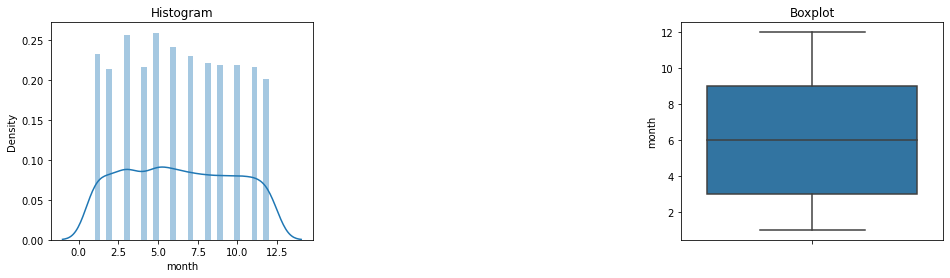

***** day *****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


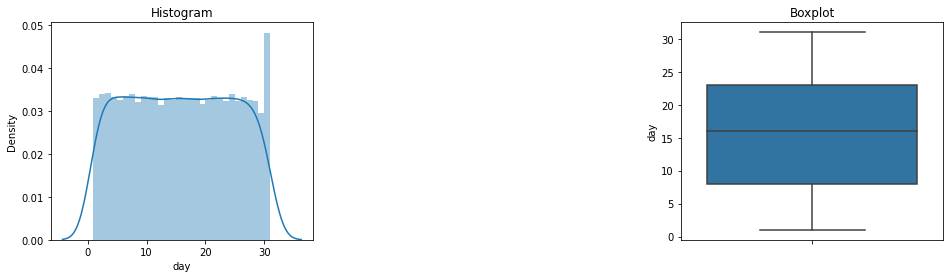

In [28]:
#Calling diagnostic_plots function after handling outliers
for item in df2.columns:
    print("***** {} *****".format(item))
    diagnostic_plots(df2, item)

Now all outliers are gone

## Performing EDD on our dataset(After Preprocessing)

In [29]:
df2.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,month,day
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,14.889783,23.014332,0.746646,5.168323,7.216398,68.062733,54.487578,1018.376149,1016.036859,4.155145,4.192367,17.842298,21.554352,0.252174,0.254348,2012.308075,6.370186,15.643168
std,4.564271,4.401503,1.198663,2.736820,3.796151,15.000418,16.161911,6.955953,6.972531,2.505873,2.407694,4.902826,4.216069,0.434328,0.435562,2.765248,3.402334,8.800558
min,4.300000,11.700000,0.000000,0.000000,0.000000,25.000000,14.000000,999.850000,997.050000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000,2008.000000,1.000000,1.000000
25%,11.000000,19.700000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,1.000000,2.000000,13.800000,18.400000,0.000000,0.000000,2010.000000,3.000000,8.000000
50%,15.000000,22.900000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000,2012.000000,6.000000,16.000000
75%,18.800000,26.000000,1.200000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.525000,1.000000,1.000000,2015.000000,9.000000,23.000000
max,27.600000,35.450000,3.000000,12.700000,13.600000,100.000000,94.000000,1037.050000,1035.050000,9.000000,8.000000,33.550000,33.712500,1.000000,1.000000,2017.000000,12.000000,31.000000


## Split Dataframe in train and test

In [30]:
X = df2.drop(["RainTomorrow"], axis = 1)
y = df2["RainTomorrow"]

In [31]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51 )

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (2576, 17)
Shape of y_train =  (2576,)
Shape of X_test =  (644, 17)
Shape of y_test =  (644,)


## Feature Scaling

### Converting differnet units and magnitude data in one unit

In [32]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Rainfall Prediction Machine Learning Model Building

Now we have clean data to build the ML model. But which machine learning algorithm is best for the data we have to find. The output is classification fromat so we will use supervised classification machine learning algorithms.

To build the best model, we have to train and test the dataset with multiple Machine Learning algorithm then we can find the best ML model. So lets try.

In [33]:
# Importing libraries for finding accuracy_score, confusion_matrix, classification_report, roc_curve and roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score

## Defining a custom fuction to run different models

In [34]:
def  evaluate_classifier(clf, x_train, x_test, y_train, y_test):
    #fit the classifier
    clf.fit(X_train, y_train)
    
    #Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    #calculate metrics
    accuracy_test  = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    cm= confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Accuracy_train", accuracy_train)
    print("Accuracy_test", accuracy_test)
    
    #Create a heatmap of the confusion matrix
    plt.figure(figsize=(2,1))
    sns.heatmap(cm, annot=True, cmap = "Blues", fmt = "d", cbar = False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    #Calculate the predicted probabilities of the positive class
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    #Compute the false positive rate,and thresholds 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    #compute the Area Under the curve(AUC)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    #plot the ROC curve
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    
    #Print classification report, and AUC score
    print("\nClassification Report:")
    print(report)
    print("AUC Score: ", auc)
    
    return accuracy_train, accuracy_test, auc

## Random Forest Classifier

Accuracy_train 1.0
Accuracy_test 0.8291925465838509


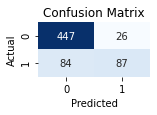


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       473
         1.0       0.77      0.51      0.61       171

    accuracy                           0.83       644
   macro avg       0.81      0.73      0.75       644
weighted avg       0.82      0.83      0.82       644

AUC Score:  0.8537826242844603


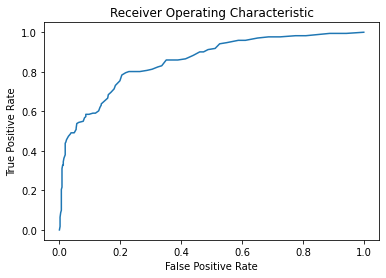

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_accu_train , rf_accu_test, rf_auc  = evaluate_classifier(rf, X_train, X_test, y_train, y_test)

## Linear Discriminant Analysis

Accuracy_train 0.8385093167701864
Accuracy_test 0.827639751552795


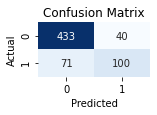


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       473
         1.0       0.71      0.58      0.64       171

    accuracy                           0.83       644
   macro avg       0.79      0.75      0.76       644
weighted avg       0.82      0.83      0.82       644

AUC Score:  0.8425256234313762


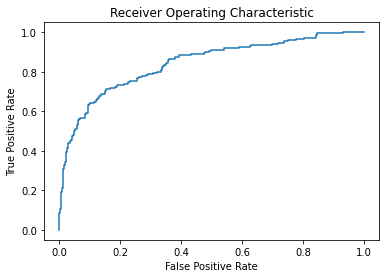

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda_accu_train, lda_accu_test, lda_auc = evaluate_classifier(lda, X_train, X_test, y_train, y_test)

## Logistic Regression

Accuracy_train 0.8392857142857143
Accuracy_test 0.8322981366459627


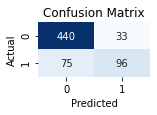


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       473
         1.0       0.74      0.56      0.64       171

    accuracy                           0.83       644
   macro avg       0.80      0.75      0.77       644
weighted avg       0.83      0.83      0.82       644

AUC Score:  0.8430696190794111


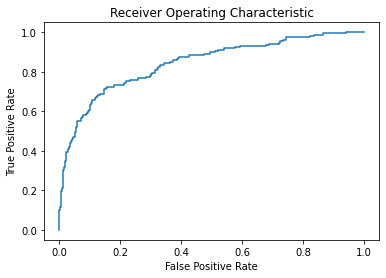

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg_accu_train , logreg_accu_test, logreg_auc = evaluate_classifier(logreg, X_train, X_test, y_train, y_test)

## Support Vector Classifier

Accuracy_train 0.8563664596273292
Accuracy_test 0.827639751552795


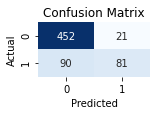


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       473
         1.0       0.79      0.47      0.59       171

    accuracy                           0.83       644
   macro avg       0.81      0.71      0.74       644
weighted avg       0.82      0.83      0.81       644

AUC Score:  0.8351322280330848


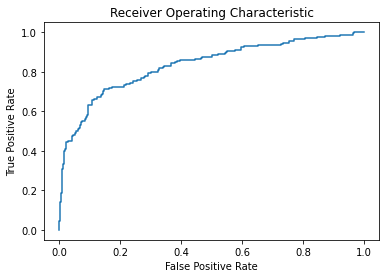

In [38]:
from sklearn.svm import SVC
svc = SVC(probability = True)

svc_accu_train, svc_accu_test, svc_auc = evaluate_classifier(svc, X_train, X_test, y_train, y_test)

## Decision Tree Classifier

Accuracy_train 1.0
Accuracy_test 0.7732919254658385


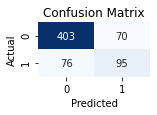


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       473
         1.0       0.58      0.56      0.57       171

    accuracy                           0.77       644
   macro avg       0.71      0.70      0.71       644
weighted avg       0.77      0.77      0.77       644

AUC Score:  0.7037820061075876


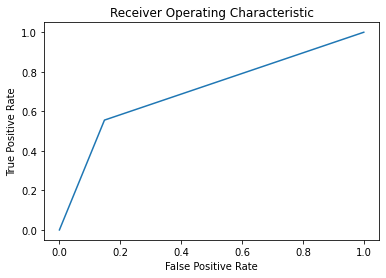

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc_accu_train, dtc_accu_test, dtc_auc = evaluate_classifier(dtc, X_train, X_test, y_train, y_test)

## Bagging Classifier

Accuracy_train 0.9650621118012422
Accuracy_test 0.843167701863354


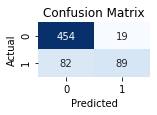


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       473
         1.0       0.82      0.52      0.64       171

    accuracy                           0.84       644
   macro avg       0.84      0.74      0.77       644
weighted avg       0.84      0.84      0.83       644

AUC Score:  0.8506979216893538


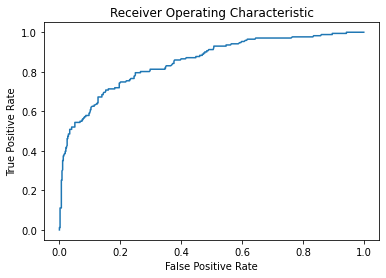

In [40]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator = RandomForestClassifier(), n_estimators = 10)

bagging_accu_train , bagging_accu_test, bagging_auc = evaluate_classifier(bagging, X_train, X_test, y_train, y_test
                                                                         )

## AdaBoost Classifier

Accuracy_train 1.0
Accuracy_test 0.8291925465838509


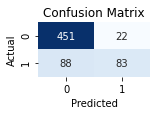


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       473
         1.0       0.79      0.49      0.60       171

    accuracy                           0.83       644
   macro avg       0.81      0.72      0.75       644
weighted avg       0.82      0.83      0.81       644

AUC Score:  0.8505495592398897


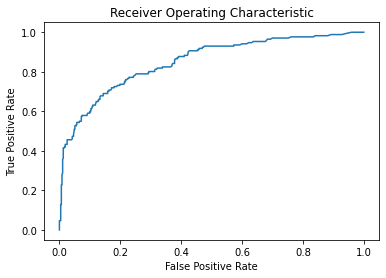

In [41]:
from sklearn.ensemble import AdaBoostClassifier
boosting = AdaBoostClassifier(base_estimator = RandomForestClassifier(), n_estimators = 10)

boosting_accu_train , boosting_accu_test, boosting_auc = evaluate_classifier(boosting, X_train, X_test, y_train, y_test)

## KNN Classifier

Accuracy_train 0.8695652173913043
Accuracy_test 0.8012422360248447


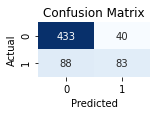


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       473
         1.0       0.67      0.49      0.56       171

    accuracy                           0.80       644
   macro avg       0.75      0.70      0.72       644
weighted avg       0.79      0.80      0.79       644

AUC Score:  0.7904565854382256


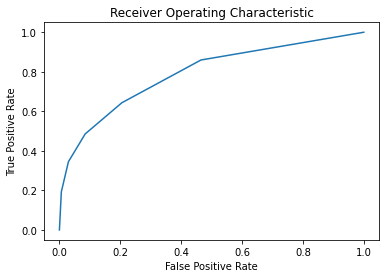

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn_accu_train, knn_accu_test, knn_auc  = evaluate_classifier(knn, X_train, X_test, y_train, y_test)

## Final Score Summary of Different Models

In [43]:
data = [
        {'Model' : 'Logistic Regression', 'Accuracy_train' : logreg_accu_train , 'Accuracy_test' : logreg_accu_test, 'AUC_score': logreg_auc },
        {'Model' : 'Linear Discriminant Model', 'Accuracy_train' : lda_accu_train , 'Accuracy_test' : lda_accu_test, 'AUC_score': lda_auc },
        {'Model' : 'Random Forest CLassifier', 'Accuracy_train' : rf_accu_train , 'Accuracy_test' : rf_accu_test, 'AUC_score': rf_auc },
        {'Model' : 'Decision Tree Classifier', 'Accuracy_train' : dtc_accu_train , 'Accuracy_test' : dtc_accu_test, 'AUC_score': dtc_auc },
        {'Model' : 'Support Vector Classifier', 'Accuracy_train' : svc_accu_train , 'Accuracy_test' : svc_accu_test, 'AUC_score': svc_auc },
        {'Model' : 'Bagging Classifier', 'Accuracy_train' : bagging_accu_train , 'Accuracy_test' : bagging_accu_test, 'AUC_score': bagging_auc },
        {'Model' : 'KNN Classifier', 'Accuracy_train' : knn_accu_train , 'Accuracy_test' : knn_accu_test, 'AUC_score': knn_auc },
        {'Model' : 'AdaBoost Classifier', 'Accuracy_train' : boosting_accu_train , 'Accuracy_test' : boosting_accu_test, 'AUC_score':boosting_auc }
]

df  = pd.DataFrame(data, columns = ['Model' , 'Accuracy_train' , 'Accuracy_test' , 'AUC_score'])
print(df)         

                       Model  Accuracy_train  Accuracy_test  AUC_score
0        Logistic Regression        0.839286       0.832298   0.843070
1  Linear Discriminant Model        0.838509       0.827640   0.842526
2   Random Forest CLassifier        1.000000       0.829193   0.853783
3   Decision Tree Classifier        1.000000       0.773292   0.703782
4  Support Vector Classifier        0.856366       0.827640   0.835132
5         Bagging Classifier        0.965062       0.843168   0.850698
6             KNN Classifier        0.869565       0.801242   0.790457
7        AdaBoost Classifier        1.000000       0.829193   0.850550


#### Among these above models  Bagging Classifier                              is a reliable option for accurate rainfall prediction due to its high accuracy and strong AUC score on test data. The models potential overfitting on the training data is not a significant concern as long as the model delivers reliable results on unseen data.

## Cross Validation Score for Bagging Classifier

In [44]:
from sklearn.model_selection import KFold,cross_val_score
cv_scores = cross_val_score(bagging, X_test, y_test, cv=5) 

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean Accuracy: ", cv_scores.mean())

Cross-Validation Scores:
[0.80620155 0.79069767 0.80620155 0.84496124 0.875     ]
Mean Accuracy:  0.8246124031007751


## Hyper Tuning in Bagging Classifier

In [45]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'base_estimator': [LinearDiscriminantAnalysis()],
    'n_estimators': [10, 15, 50],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
}

# Create a Bagging classifier
bagging = BaggingClassifier()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(bagging, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'base_estimator': LinearDiscriminantAnalysis(), 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 10}


##  Bagging Classifier Model with best parameters according to Hypertuning

Accuracy_train 0.8377329192546584
Accuracy_test 0.8245341614906833


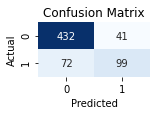


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       473
         1.0       0.71      0.58      0.64       171

    accuracy                           0.82       644
   macro avg       0.78      0.75      0.76       644
weighted avg       0.82      0.82      0.82       644

AUC Score:  0.8417714476466007


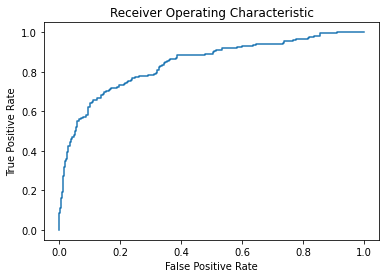

In [46]:
bagging3 = BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators = 10, max_features = 1.0, max_samples = 1.0)
bagging3_accu_train, bagging3_accu_test, bagging3_auc = evaluate_classifier(bagging3, X_train, X_test, y_train, y_test)

### As in our Bagging model before hypertuning there is more accuracy on testing and also have more AUC score than after hypertuning so it is preferrable to use the model before hypertuning 

# Predicting y_test values And Compare with the actual y_test values 

In [47]:
X_test.shape

(644, 17)

In [48]:
y_pred = lda.predict(X_test)

In [49]:
len(y_pred)

644

In [50]:
y_test_copy = y_test.copy()
y_test_copy.reset_index(drop = True, inplace = True)
y_test_copy.shape

(644,)

In [51]:
df_results = pd.DataFrame({'Actual RainTomorrow': y_test_copy,'Predicted RainTomorrow': y_pred})

In [52]:
# This below code will help to look at all rows and columns
pd.set_option('display.max_rows',None)

In [53]:
df_results

,Actual RainTomorrow,Predicted RainTomorrow
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,1.0,0.0
6,0.0,0.0
7,0.0,1.0
8,1.0,0.0
9,0.0,0.0


### From the above DataFrame we can compare the actual values that are given in data with values that our model suggest

### Now this model is ready to deploy with Bagging Classifier

# Question Answers

## 1. Your views about the problem statement?

Problem Description:

This problem revolves around predicting tomorrow's rainfall based on the provided features in the "sydney_rain_prediction" file. The dataset contains 17/18 columns,which includes various features. The primary objective is to find the best machine learning model capable of accurately predicting rainfall for tomorrow.

The problem is classified as a binary classification task, where we aim to predict binary values (1 or 0). A value of 1 indicates that there will be rainfall tomorrow, while 0 indicates no rainfall tomorrow. To achieve this, we can deploy various machine learning models suitable for solving classification problems and determine the most effective model for this task.

As the dataset provides both the input data and the corresponding output (RainTomorrow), this problem falls under the category of supervised classification problems.

To identify the optimal model for predicting tomorrow's rainfall, we can apply different classification models and evaluate their performance using metrics such as accuracy_score, Confusion Matrix, AUC_score, and more. These evaluations will help us determine the model that performs best in predicting rainfall for tomorrow in the given context.

## 2.  What will be your approach to solving this task?

To solve this problem, I have outlined the following steps:

1. Import the basic necessary libraries: numpy, pandas, matplotlib and seaborn.
2. Load the required datasets using pandas.
3. Check for any null values in the dataset and remove rows with less than 5% missing values. Fill the remaining missing values with the mean of their corresponding column.
4. Obtain information about the dataset, including the number of categorical and numerical features.
5. Convert all categorical features into numerical format.
6. Check for duplicate rows in the dataset (No duplicate rows were found).
7. Look for multicollinearity between columns and remove one of the highly correlated columns.
8. Look for outliers by creating scatter distribution plots and box plots.
9. Handle outliers using the interquartile range (IQR) method.
10. Split the data into training and testing sets using an 80:20 ratio.
11. Perform feature scaling on the X_train and y_train data.
12. Create a custom function that provides a summary report for different models based on the input.
13. Check different models by importing the corresponding model libraries and calling the function with the required parameters.
14. Generate a table containing the accuracy of the train data (for checking overfitting), accuracy of the test data, and AUC score.
15. Based on the table, determine that Bagging has the highest accuracy and AUC score.
16. Perform cross-validation on the Bagging model.
17. Optimize the Bagging model by adjusting its parameters using hyperparameter tuning.
18. After hyperparameter tuning, observe decrement in the results. Therefore, preferred the Bagging Classifier model before hyperparameter tuning due to computational efficiency.
19. Generate a table that show the actual RainTomorrow and predicted RainTomorrow.

## 3.  What ML model options did you have available to perform this task?

Models for Supervised Classification:

To solve the supervised classification problem of predicting tomorrow's rainfall, the following models can be utilized:

1. Logistic Regression
2. Linear Discriminant Analysis
3. K-Nearest Neighbors (KNN) Classifier
4. Random Forest Classifier
5. Decision Tree Classifier
6. Support Vector Classifier (SVC)
7. Naive Bayes Classifier
8. Gradient Boosting Classifier
9. Extreme Gradient Boosting (XGBoost) Classifier
10. Neural Network (Multi-layer Perceptron) Classifier
11. Gaussian Process Classifier
12. Quadratic Discriminant Analysis
13. Bagging Classifier
14. AdaBoost Classifier
15. Extra Trees Classifier

These models are commonly used for classification tasks and can be applied to accurately predict rainfall for tomorrow based on the given features.

## 4.  Which model’s performance is best and what could be the possible reason for that?

The Bagging classifier was chosen as the best model for predicting rainfall. 
Among these above models Bagging Classifier is a reliable option for accurate rainfall prediction due to its high accuracy of 0.840062 and strong AUC score of 0.851687 which is highest among other models on test data.
Here are some key reasons for its superior performance:

1. Bagging combines multiple models to capture complex relationships in the data, leading to accurate rainfall predictions.
2. It reduces overfitting by training each model on different subsets of the data, enhancing the model's ability to work with new, unseen data.
3. Bagging is computationally efficient and works well with large datasets.
4. It can handle both simple and complex relationships between features and rainfall prediction.
5. Bagging provides insights into important features for predicting rainfall.

These reasons highlight why the Bagging classifier stood out as the top choice for predicting rainfall accurately.

## 5.  What steps can you take to improve this selected model’s performance even further?

To further improve the performance of the selected Bagging classifier model, we can focus on the following key points:

1. Feature Selection: Evaluate the importance of each feature and select the most relevant ones for rainfall prediction. Removing irrelevant or highly correlated features can enhance the model's performance.

2. Hyperparameter Tuning: Experiment with different hyperparameter settings for the Bagging classifier. Adjust parameters like the number of base estimators, maximum samples, or maximum features to find the optimal configuration for your specific dataset.

3. Cross-Validation: Implement cross-validation techniques to assess the model's performance more accurately. Use techniques like k-fold cross-validation to obtain a better estimate of the model's ability to generalize to unseen data.

4. Data Cleaning and Preprocessing: Ensure the dataset is clean and handle outliers or missing values appropriately. Clean and preprocess the data by applying techniques like normalization, scaling, or imputation to improve the model's predictions.

5. Ensemble Methods: Consider using ensemble techniques like bagging or boosting with different base estimators. By combining multiple Bagging classifier models or other classifiers, you can potentially improve the prediction accuracy and overall robustness of the model.

By addressing these points, we can refine our Bagging classifier model and potentially achieve better performance in predicting rainfall.